In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
titanic = pd.read_csv('train.csv')

# Предобработка данных
def preprocess_data(df):
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

titanic = preprocess_data(titanic)

In [3]:
# Разделение на признаки и целевую переменную
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение классификаторов
classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Функция для обучения и оценки модели
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }


In [4]:
# Сбор результатов
results = {
    "Classifier": [],
    "Strategy": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

strategies = {
    "Без перевзвешивания": (X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train),
    "Undersampling": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
}

for strategy_name, (X_train_strat, y_train_strat) in strategies.items():
    for clf_name, clf in classifiers.items():
        metrics = evaluate_classifier(clf, X_train_strat, y_train_strat, X_test, y_test)
        results["Classifier"].append(clf_name)
        results["Strategy"].append(strategy_name)
        results["Accuracy"].append(metrics["accuracy"])
        results["Precision"].append(metrics["precision"])
        results["Recall"].append(metrics["recall"])
        results["F1 Score"].append(metrics["f1_score"])

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

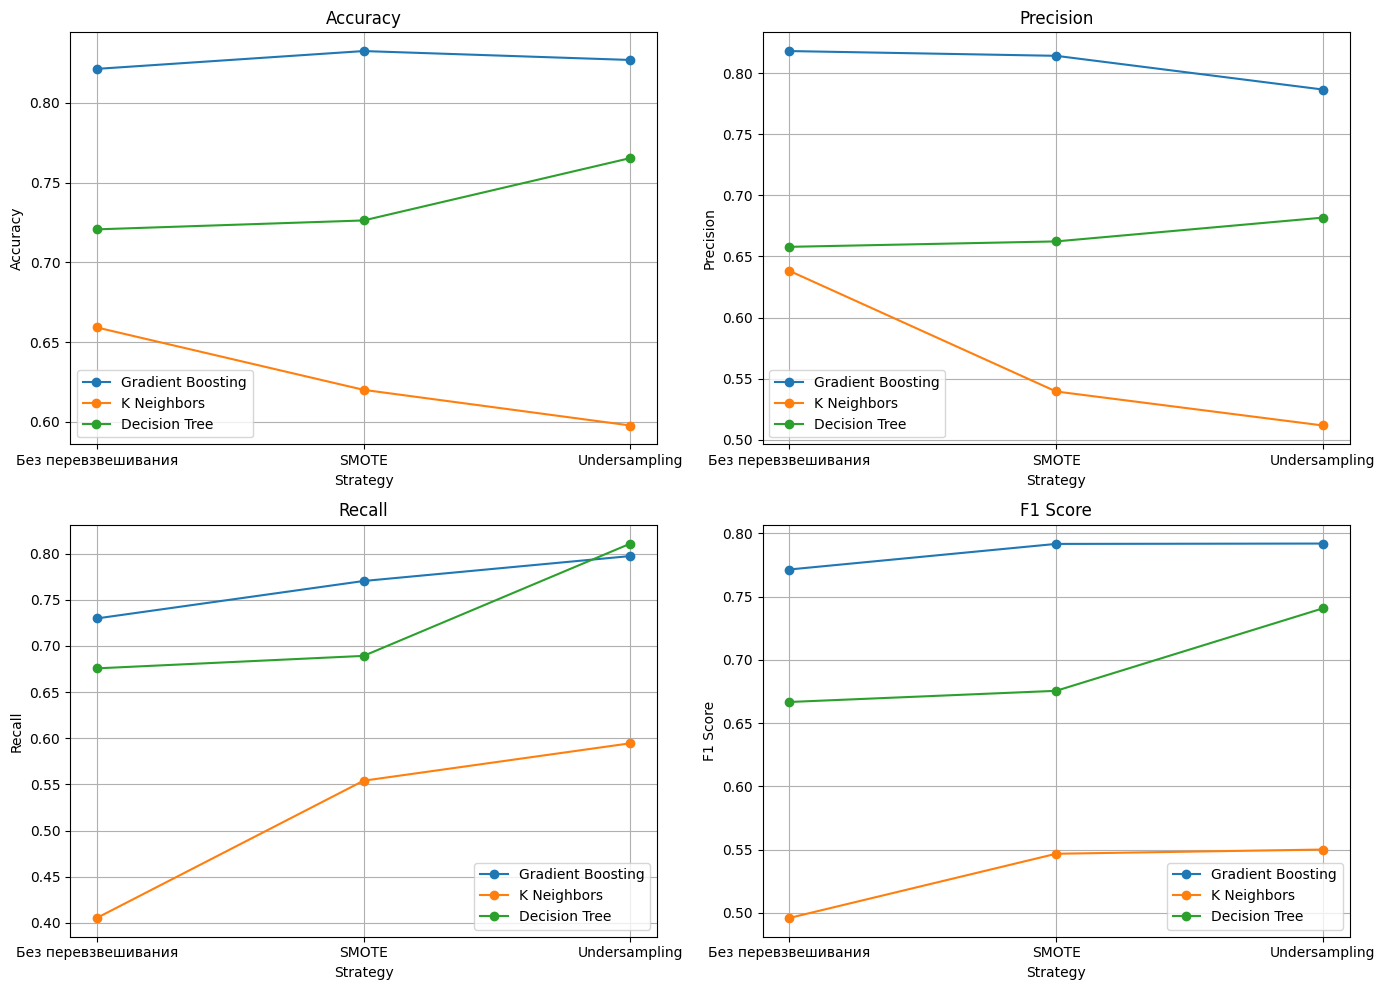

In [5]:
# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    for clf_name in classifiers.keys():
        subset = results_df[results_df["Classifier"] == clf_name]
        ax.plot(subset["Strategy"], subset[metric], marker='o', label=clf_name)
    ax.set_title(metric)
    ax.set_xlabel("Strategy")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [6]:
results = {
    "Classifier": [],
    "Strategy": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

strategies = {
    "Без перевзвешивания": (X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train),
    "Undersampling": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
}

for strategy_name, (X_train_strat, y_train_strat) in strategies.items():
    for clf_name, clf in classifiers.items():
        metrics = evaluate_classifier(clf, X_train_strat, y_train_strat, X_test, y_test)
        results["Classifier"].append(clf_name)
        results["Strategy"].append(strategy_name)
        results["Accuracy"].append(metrics["accuracy"])
        results["Precision"].append(metrics["precision"])
        results["Recall"].append(metrics["recall"])
        results["F1 Score"].append(metrics["f1_score"])

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Вывод результатов
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_df)

          Classifier             Strategy  Accuracy  Precision  Recall  \
0  Gradient Boosting  Без перевзвешивания    0.8212     0.8182  0.7297   
1        K Neighbors  Без перевзвешивания    0.6592     0.6383  0.4054   
2      Decision Tree  Без перевзвешивания    0.7207     0.6579  0.6757   
3  Gradient Boosting                SMOTE    0.8324     0.8143  0.7703   
4        K Neighbors                SMOTE    0.6201     0.5395  0.5541   
5      Decision Tree                SMOTE    0.7263     0.6623  0.6892   
6  Gradient Boosting        Undersampling    0.8268     0.7867  0.7973   
7        K Neighbors        Undersampling    0.5978     0.5116  0.5946   
8      Decision Tree        Undersampling    0.7654     0.6818  0.8108   

   F1 Score  
0    0.7714  
1    0.4959  
2    0.6667  
3    0.7917  
4    0.5467  
5    0.6755  
6    0.7919  
7    0.5500  
8    0.7407  
